In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d

from dotenv import load_dotenv, find_dotenv
from pathlib import Path

from src.data.rgbd import load_rgbd

# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()
project_dir = Path(dotenv_path).parent

# load up the entries as environment variables
load_dotenv(dotenv_path)

o3d.visualization.webrtc_server.enable_webrtc()

[Open3D INFO] WebRTC GUI backend enabled.


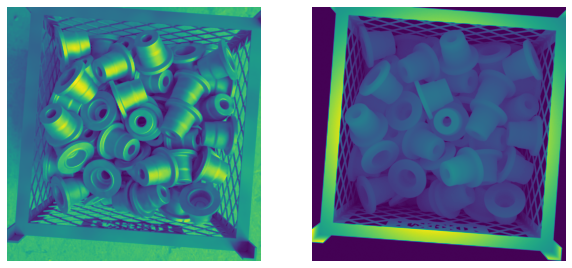

In [19]:
raw_data_dir = project_dir/'data/raw/render_results'

img_fpath = np.random.choice(list(raw_data_dir.glob('simulacao*/*.png')))

rgbd_img = load_rgbd(img_fpath)

fig, axs = plt.subplots(1,2)
fig.set_size_inches(10,10)

axs[0].imshow(rgbd_img.color)
axs[1].imshow(rgbd_img.depth)

axs[0].set_axis_off()
axs[1].set_axis_off()

fig.show()

In [20]:
np.asarray(rgbd_img.depth).max()

0.85882354

In [21]:
np.asarray(rgbd_img.depth).min()

0.1882353

In [22]:
camera_params = o3d.camera.PinholeCameraIntrinsic(512,512,711.1111,711.1111,256,256)
# camera_params = o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault)

pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_img, camera_params)
np.asarray(pcd.points)

array([[-0.06917647, -0.06917647,  0.19215687],
       [-0.06890625, -0.06917647,  0.19215687],
       [-0.06863603, -0.06917647,  0.19215687],
       ...,
       [ 0.06836581,  0.06890625,  0.19215687],
       [ 0.06863603,  0.06890625,  0.19215687],
       [ 0.06890625,  0.06890625,  0.19215687]])

In [23]:
o3d.visualization.draw([pcd])

[Open3D INFO] Window window_3 created.
[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: closing, peerid: 0.5399526346407664
[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: closed, peerid: 0.5399526346407664
[Open3D INFO] DataChannelObserver::OnStateChange label: ClientDataChannel, state: closing, peerid: 0.5399526346407664
[Open3D INFO] DataChannelObserver::OnStateChange label: ClientDataChannel, state: closed, peerid: 0.5399526346407664
[Open3D INFO] [Called HTTP API] /api/hangup
[Open3D INFO] [Called HTTP API] /api/getMediaList
[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: closing, peerid: 0.2148948690149819
[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: closed, peerid: 0.2148948690149819
[Open3D INFO] DataChannelObserver::OnStateChange label: ClientDataChannel, state: closing, peerid: 0.2148948690149819
[Open3D INFO] DataChannelObserver::OnStateCh

[245:197][859836] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0


[Open3D INFO] [Called HTTP API] /api/getIceServers
[Open3D INFO] [Called HTTP API] /api/call


[245:418][859836] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0


[Open3D INFO] [Called HTTP API] /api/call
[Open3D INFO] [Called HTTP API] /api/call
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/getIceCandidate


[245:737][859836] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0
[245:925][859836] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0


[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/getIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/hangup
[Open3D INFO] [Called HTTP API] /api/getMediaList
[Open3D INFO] [Called HTTP API] /api/getIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate


[251:197][859846] (dtls_transport.cc:529): DtlsTransport[0|1|R_]: OnWritableState() called in state DTLS_TRANSPORT_CLOSED.


[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: open, peerid: 0.5432031360949185
[Open3D INFO] DataChannelObserver::OnStateChange label: ClientDataChannel, state: open, peerid: 0.5432031360949185
[Open3D INFO] Sending init frames to window_3.
[Open3D INFO] [Called HTTP API] /api/getMediaList[Open3D INFO] [Called HTTP API] /api/getIceCandidate

[Open3D INFO] [Called HTTP API] /api/hangup
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: open, peerid: 0.9702940094314219
[Open3D INFO] DataChannelObserver::OnStateChange label: ClientDataChannel, state: open, peerid: 0.9702940094314219
[Open3D INFO] Sending init frames to window_1.


[290:196][859846] (stun_port.cc:96): Binding request timed out from 150.162.14.x:52729 (enp5s0)
[290:196][859846] (stun_port.cc:96): Binding request timed out from 150.162.14.x:60072 (enp5s0)


KeyboardInterrupt: 

In [11]:
np.asarray(pcd.points)

array([[-0.00029082, -0.00029082,  0.00080784],
       [-0.00028969, -0.00029082,  0.00080784],
       [-0.00028855, -0.00029082,  0.00080784],
       ...,
       [ 0.00028742,  0.00028969,  0.00080784],
       [ 0.00028855,  0.00028969,  0.00080784],
       [ 0.00028969,  0.00028969,  0.00080784]])